In [3]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

In [4]:
df = pd.read_csv(r"final_test.csv")
df.head(5)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [5]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [6]:
df['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [7]:
df=df.replace({'XXS':1, 'S':2,'M':3,'L':4,'XL':5,'XXL':6,'XXXL':7})

In [8]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [9]:
df = df.dropna()

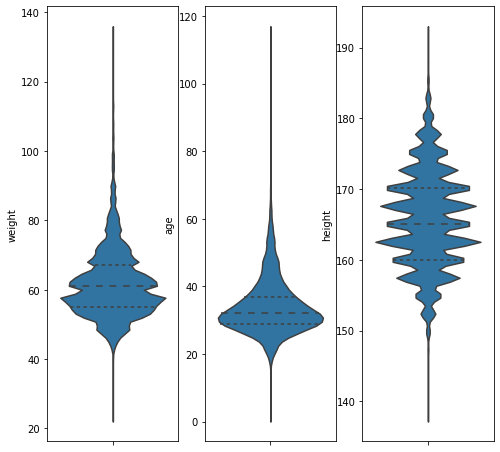

In [10]:
plt.figure(figsize = (8,8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    ax = sns.violinplot(y=df.columns[i], data=df, cut=0, inner="quartiles")
plt.show()

In [11]:
q1=df['age'].quantile(0.999)
q2=df['age'].quantile(0.001)
df=df[df['age']<q1]
df=df[df['age']>q2]

In [12]:
q3=df['weight'].quantile(0.99)
q4=df['weight'].quantile(0.01)
df=df[df['weight']<q3]
df=df[df['weight']>q4]

In [35]:
df['bmi'] = df['weight']/df['height']/df['height']*10000

In [13]:
df.describe()

,weight,age,height,size
count,115976.00000,115976.000000,115976.000000,115976.000000
mean,61.47208,34.022712,165.875123,3.823050
std,8.69036,7.905054,6.661721,1.831027
min,46.00000,18.000000,137.160000,1.000000
25%,56.00000,29.000000,160.020000,2.000000
50%,61.00000,32.000000,165.100000,3.000000
75%,66.00000,37.000000,170.180000,5.000000
max,94.00000,69.000000,193.040000,7.000000


In [14]:
d_df = df["size"].value_counts().reset_index()
fig = px.pie(d_df, values="size", names=["XXS", "S", "M", "L", "XL", "XXL", "XXXL"], hole=0.3, opacity = 0.8, labels={"0" :"XXS","1":"S","2":"M","3":"L","4":"L","5":"XL","6":"XXL","7":"XXXL"})
fig.update_layout(title = dict(text = "Pie Chart People's Clothes Size"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

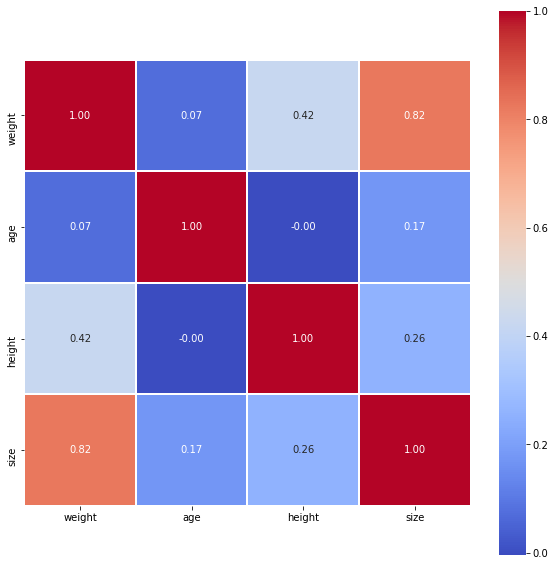

In [15]:
plt.figure(figsize=(10,10))
corr = df.corr(method="spearman")
ax = sns.heatmap(corr, square=True, linewidth=1, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [23]:
X = df.drop(["size"], axis=1)
y = df["size"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# Scaling
#sc = StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

In [24]:
models = {"LR": LinearRegression(),
         "Random Forest": RandomForestRegressor(),
         "Decision Tree": DecisionTreeRegressor(),
         "xgb Classifier": XGBRegressor()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(24)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                             cv=5
                                             ).mean()

    return model_scores

In [ ]:
model_score = fit_and_score(models,X_train,X_test,y_train,y_test)

In [71]:
model_score

{'LR': 0.5410508383690525,
 'Random Forest': 0.6659140886261272,
 'Decision Tree': 0.6206145337832285,
 'xgb Classifier': 0.6976652294329527}

In [26]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
pred = model.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=pred):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=pred):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=pred):.2f}')

R^2 score: 0.72
MAE score: 0.73
EVS score: 0.72


In [28]:
y_test=pd.DataFrame(y_test)
y_pred=pd.DataFrame(pred)
y_test = y_test.reset_index()
y_test=y_test.drop('index', axis=1)
df_pred=pd.concat([y_test,y_pred],axis=1)
df_pred=df_pred.rename(columns={'size': 'actual', 0: 'pred'})
df_pred.describe()

,actual,pred
count,28994.000000,28994.000000
mean,3.836449,3.830419
std,1.833162,1.562215
min,1.000000,1.009094
25%,2.000000,2.548097
50%,3.000000,3.556669
75%,5.000000,4.953640
max,7.000000,7.454351


In [29]:
df_pred.groupby('actual')['pred'].describe()

,count,mean,std,min,25%,50%,75%,max
actual,,,,,,,,
1,2190.0,1.921733,0.503565,1.032387,1.566444,1.784678,2.153252,6.674945
2,5272.0,2.422323,0.654820,1.009094,1.944234,2.331518,2.801002,6.525746
3,7424.0,3.188179,0.783427,1.336544,2.623563,3.144956,3.650905,6.935067
4,4380.0,4.023976,0.879291,1.434124,3.429785,3.923610,4.541551,7.052214
5,4686.0,4.704535,1.015656,1.668900,3.958711,4.692153,5.423609,7.360159
6,16.0,5.355189,0.847438,3.910187,4.820640,5.369878,6.034577,6.480484
7,5026.0,6.099265,0.893317,1.411220,5.626619,6.363829,6.784814,7.454351


In [30]:
import pickle
with open('size_predictor.pkl', 'wb') as file:
    pickle.dump(model, file)